#### **Exploratory Data Analysis**

In [66]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [67]:
# Load the dataset
df_visa = pd.read_csv('df_visa.csv')

In [68]:
# Print first five dataset
df_visa.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [69]:
# Check for missing values
def missing_col():
    # Check the columns in the dataset
    df_visa_cols = df_visa.columns
    for col in df_visa_cols:
        missing_cols = df_visa[col].isna().sum()
    # Check the percentage of the missing values
        percentage_missing = (missing_cols/len(df_visa))*100
        print(f"{col} : {missing_cols}")
        if percentage_missing >1<= 5:
            df_visa.dropna()
            print(f"Dropped missing values")
        elif percentage_missing >= 5:
            # Check the categorical col and fill with mode
            cat_col = [x for x in df_visa_cols if df_visa.dtype not in ['int64', 'float64']]
            if col in cat_col:
                df_visa[col] = df_visa[col].fillna(df_visa[col].mode()[0])
                print("Filled with mode")
            # Check the numerical col and fill with median
            num_col = [x for x in df_visa_cols if x not in cat_col]
            if col in num_col:
                df_visa[col] = df_visa[col].fillna(df_visa[col].median())
                print("Filled with median")
        elif percentage_missing == 0:
            print(f"No missing values")
        else:
            print(f"{col} : {missing_cols}")
missing_col()


continent : 0
No missing values
education_of_employee : 0
No missing values
has_job_experience : 0
No missing values
requires_job_training : 0
No missing values
no_of_employees : 0
No missing values
yr_of_estab : 0
No missing values
region_of_employment : 0
No missing values
prevailing_wage : 0
No missing values
unit_of_wage : 0
No missing values
full_time_position : 0
No missing values
case_status : 0
No missing values


In [70]:
# Extract the categorical col
cat_col = [x for x in df_visa.columns if df_visa[x].dtype not in ['int64', 'float64']]
cat_col

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [71]:
# Extract the numerical col 
num_col = [x for x in df_visa.columns if x not in cat_col]
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

#### **Univariate Anaylysis**

In [72]:
# Define a function to check the statistical summary
def univariate_numerical_eda(df, column):
    """
    Perform Univariate analysis on each numerical column
    Dispaly the Statistical summary using skewness, Kurtosis, Histogram, KDE and boxplot
    """
    print(f"Feature {column}")
    print("="*40)
    # Check the desciption of the data
    print(df_visa[column].describe().to_frame())
    print(f"Skewness: {df_visa[column].skew():.3f}") # Check the skewness
    print(f"Kurtosis: {df_visa[column].kurt():.3f}") # Check the Kurtosis

    # Visualization
    plt.figure(figsize=(12,6))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f"\nDistribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='blue')
    plt.title(f"\nBoxplot of {column}", fontsize=13)
    plt.tight_layout()
    plt.show()

    # 
    if abs(df[column].skew()) > 1:
        print(f"{column} is highly skewed, Consider log or Box-Cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is Moderately skewed")
    else:
        print(f"{column} is fairly symmetric")

Feature no_of_employees
       no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Skewness: 12.265
Kurtosis: 206.335


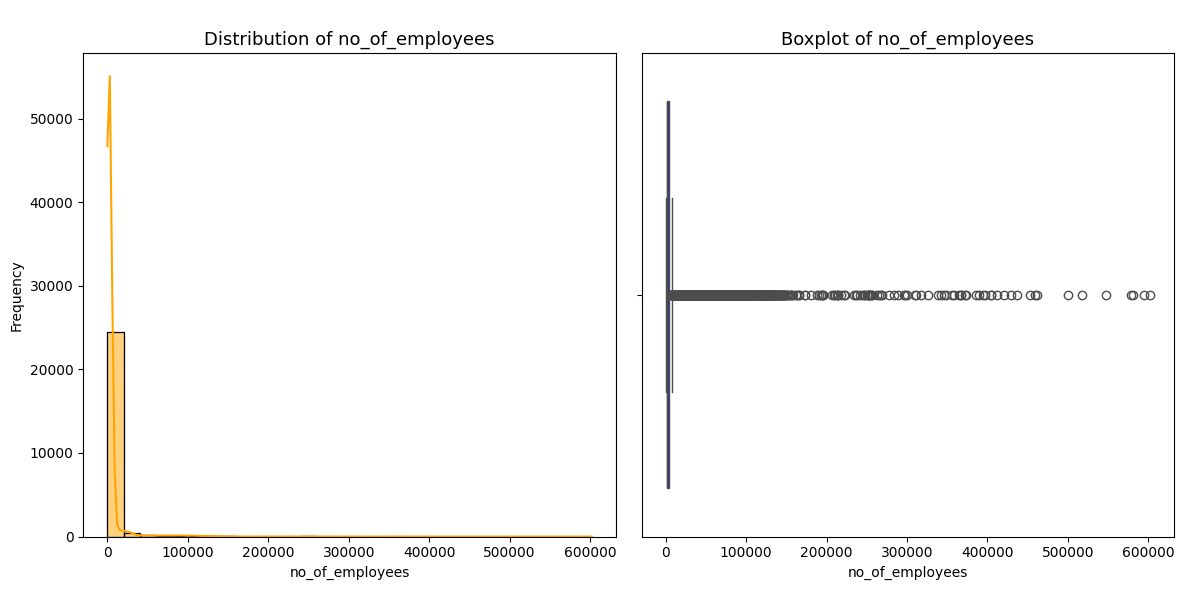

no_of_employees is highly skewed, Consider log or Box-Cox transformation
Feature yr_of_estab
        yr_of_estab
count  25480.000000
mean    1979.409929
std       42.366929
min     1800.000000
25%     1976.000000
50%     1997.000000
75%     2005.000000
max     2016.000000
Skewness: -2.037
Kurtosis: 3.507


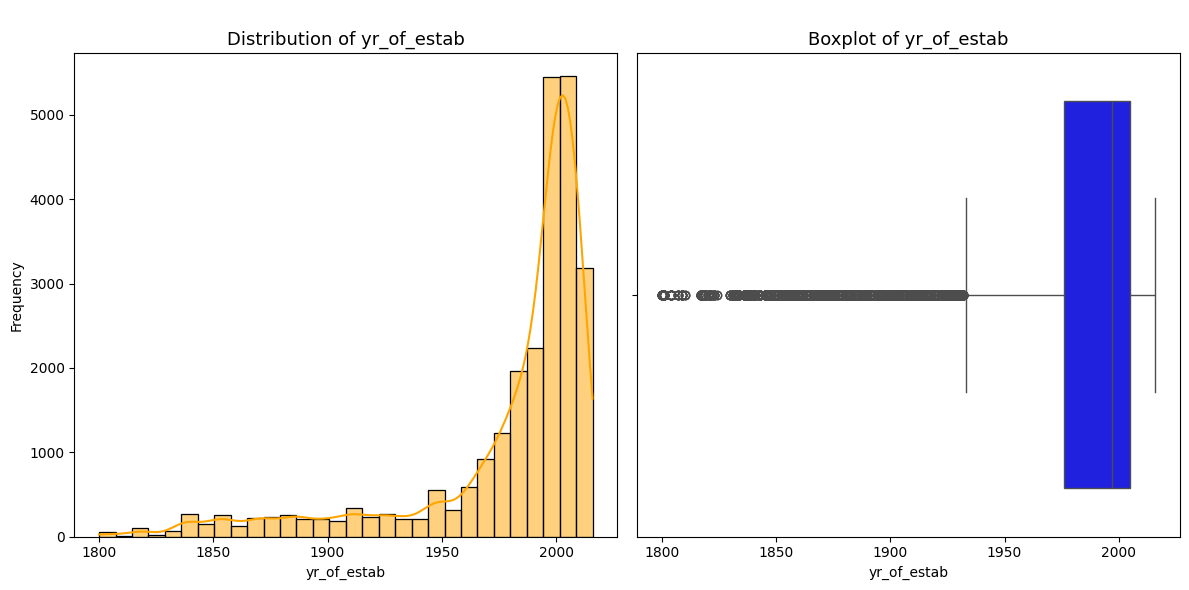

yr_of_estab is highly skewed, Consider log or Box-Cox transformation
Feature prevailing_wage
       prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Skewness: 0.756
Kurtosis: 0.824


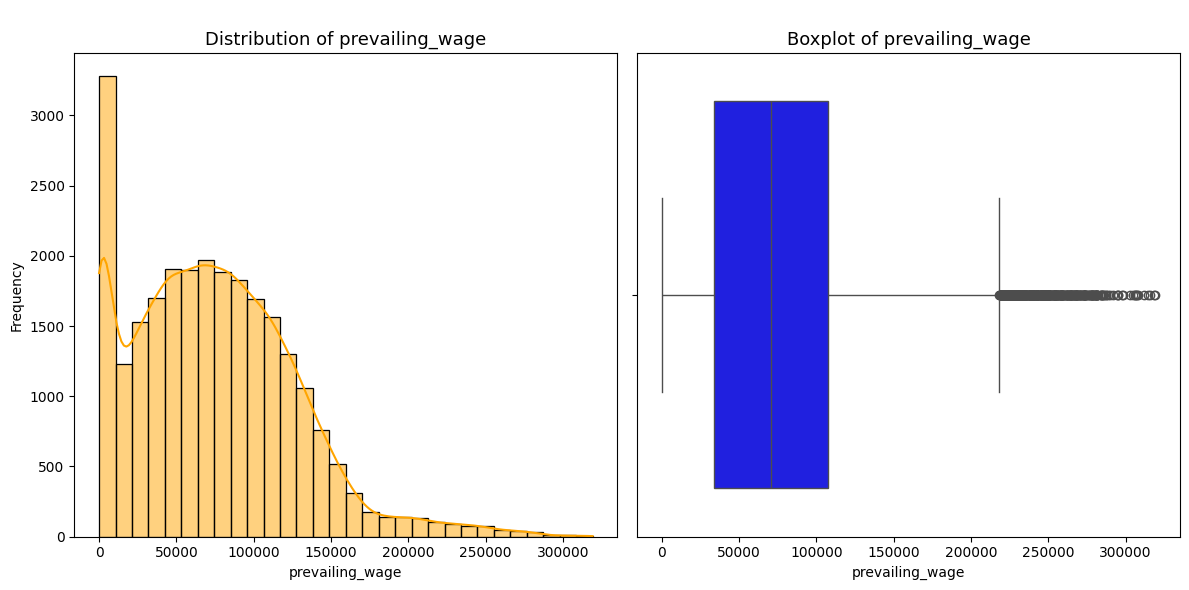

prevailing_wage is Moderately skewed


In [73]:
for col in num_col:
    univariate_numerical_eda(df_visa,col)

In [74]:
# Define the function for the categorical EDA 
def univariate_categorical_eda(df, column):
    """
    Perform univariate analysis on the categorical data. 22
    Displays Frequency table, proportion, barchart, piechart
    """
    print(f"Feature{column}")
    print("-"*40)

    # Frequency + Proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True)*100

    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)

    # Visualization (Barchart)
    plt.figure(figsize=(12,6))


    ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')
    plt.title(f"\n Distribution Barchart of {column}", fontsize=10)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    

    # Annotate each bar with the percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height() 
        ax.text(p.get_x()+ p.get_width()/2, height + 1, f"{(height/total)*100:.1f}%", ha="center")

    plt.tight_layout()
    plt.show()


Featurecontinent
----------------------------------------
               Count  Percentage
continent                       
Asia           16861       66.17
Europe          3732       14.65
North America   3292       12.92
South America    852        3.34
Africa           551        2.16
Oceania          192        0.75


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


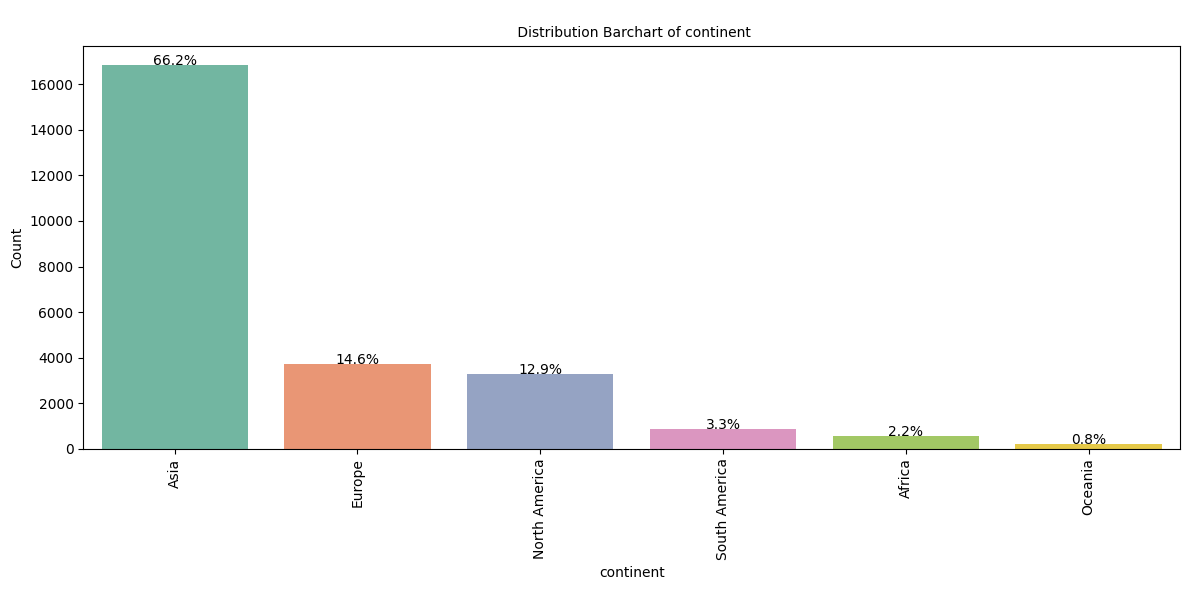

Featureeducation_of_employee
----------------------------------------
                       Count  Percentage
education_of_employee                   
Bachelor's             10234       40.16
Master's                9634       37.81
High School             3420       13.42
Doctorate               2192        8.60


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


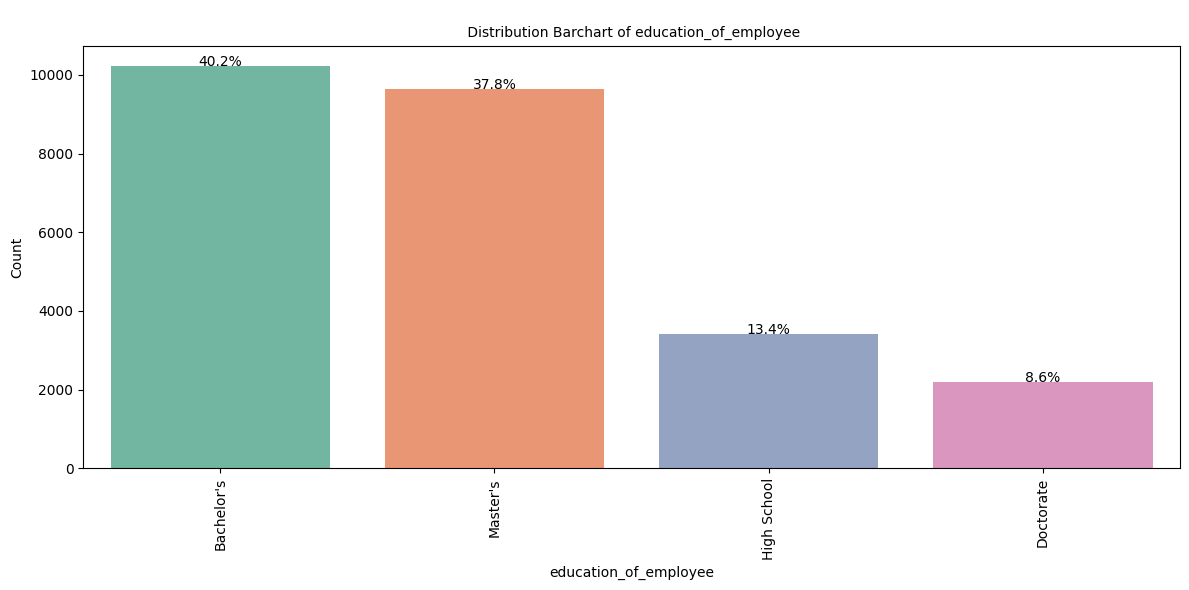

Featurehas_job_experience
----------------------------------------
                    Count  Percentage
has_job_experience                   
Y                   14802       58.09
N                   10678       41.91


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


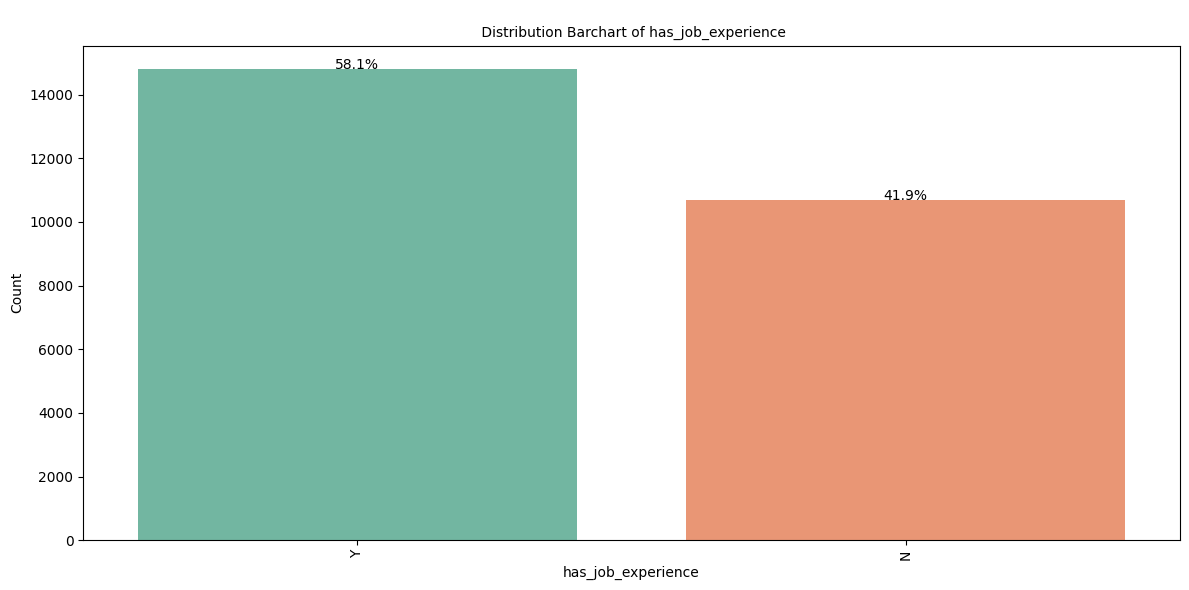

Featurerequires_job_training
----------------------------------------
                       Count  Percentage
requires_job_training                   
N                      22525        88.4
Y                       2955        11.6


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


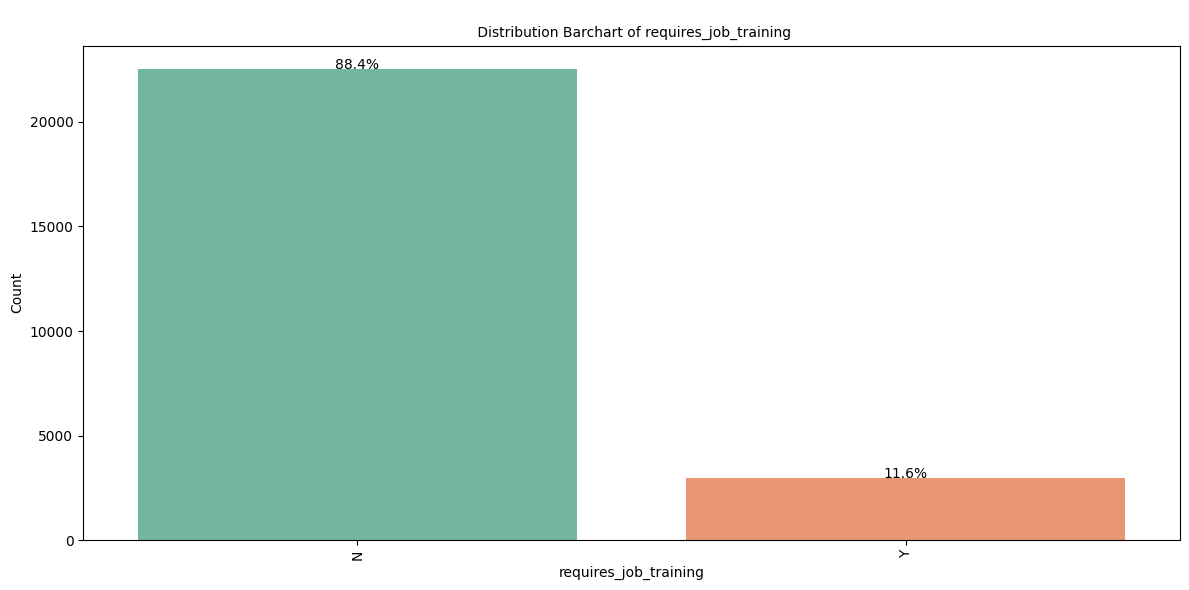

Featureregion_of_employment
----------------------------------------
                      Count  Percentage
region_of_employment                   
Northeast              7195       28.24
South                  7017       27.54
West                   6586       25.85
Midwest                4307       16.90
Island                  375        1.47


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


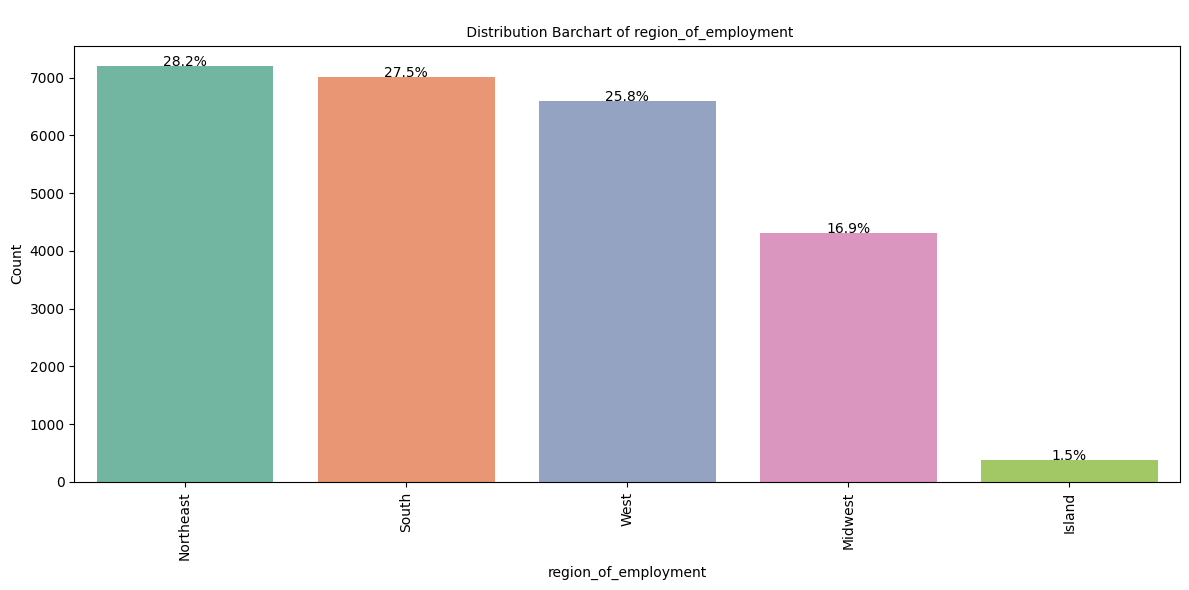

Featureunit_of_wage
----------------------------------------
              Count  Percentage
unit_of_wage                   
Year          22962       90.12
Hour           2157        8.47
Week            272        1.07
Month            89        0.35


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


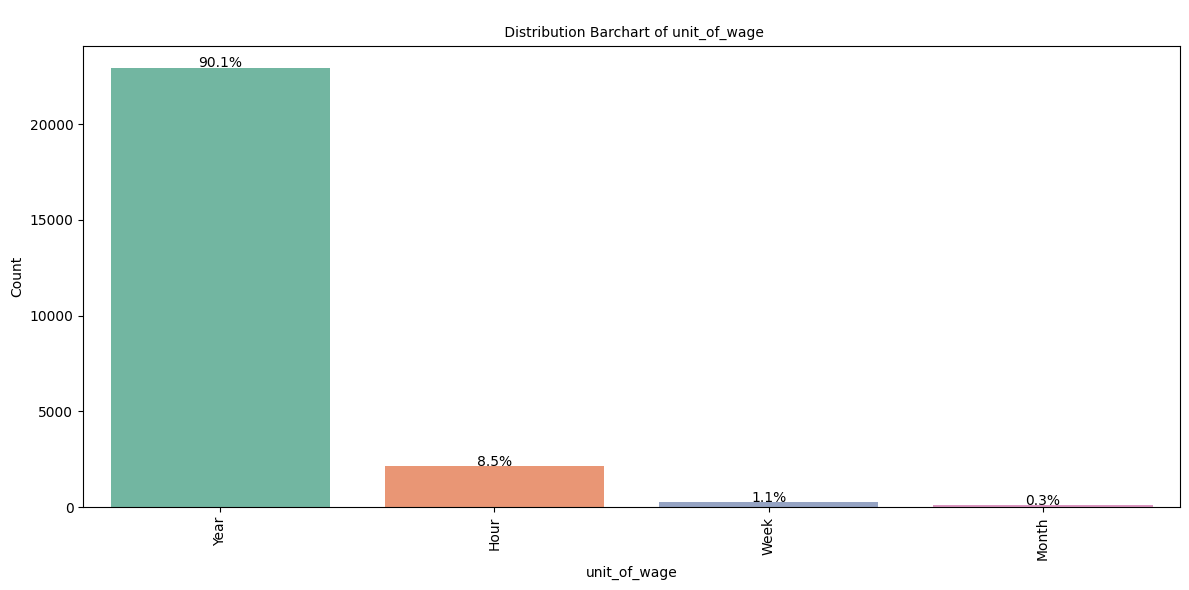

Featurefull_time_position
----------------------------------------
                    Count  Percentage
full_time_position                   
Y                   22773       89.38
N                    2707       10.62


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


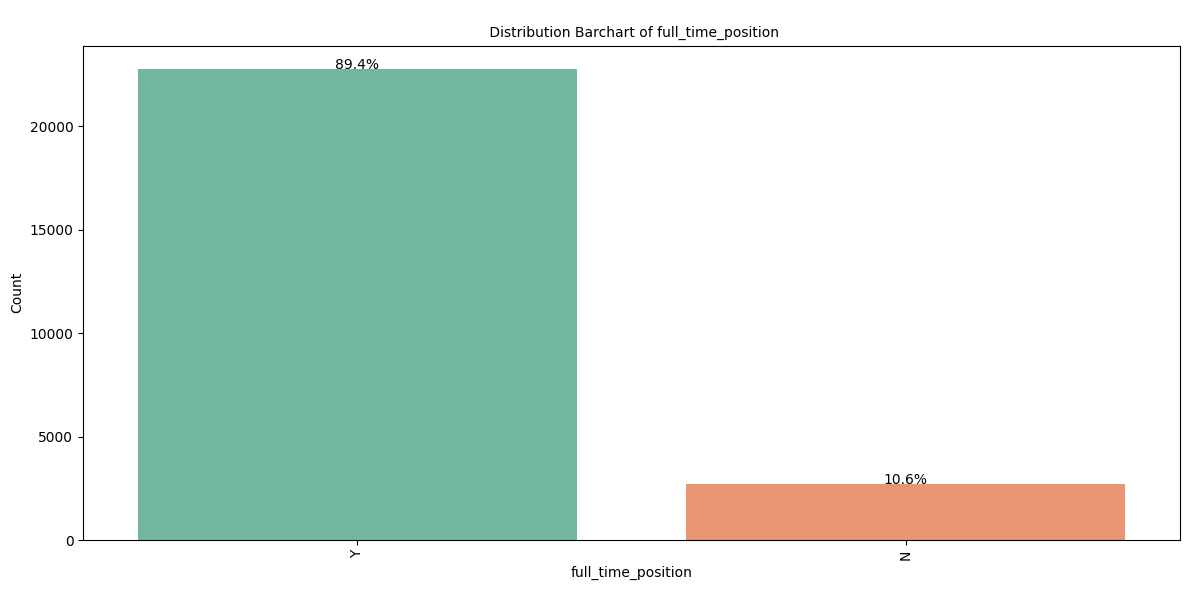

Featurecase_status
----------------------------------------
             Count  Percentage
case_status                   
Certified    17018       66.79
Denied        8462       33.21


C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\2344260600.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column, data=df_visa, palette='Set2', order=freq.index, color='orange')


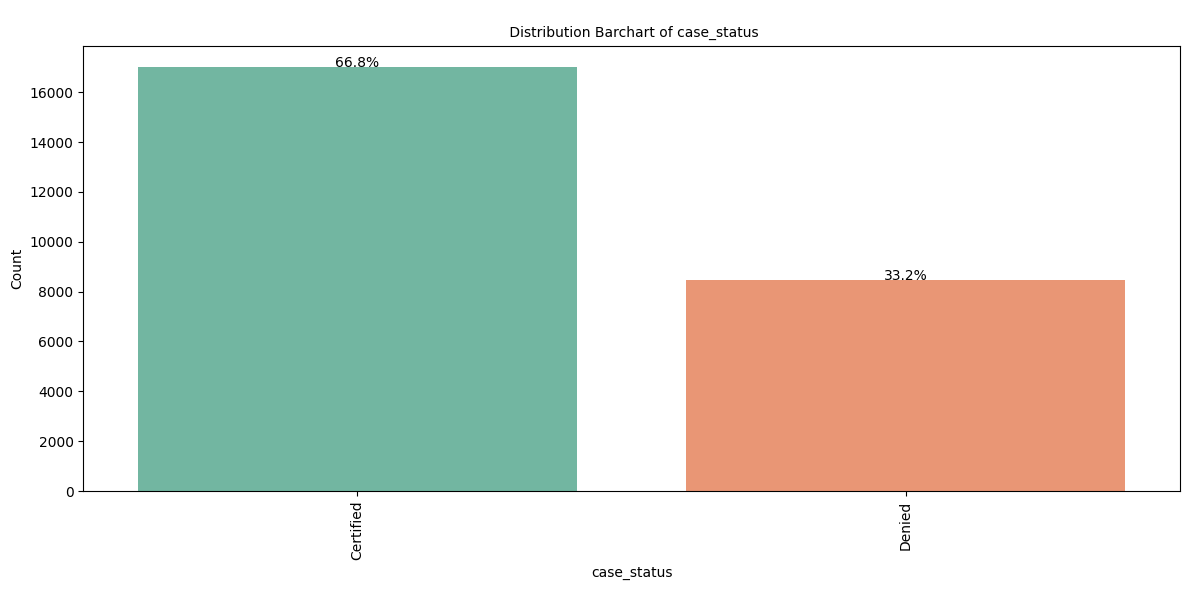

In [75]:
for col in cat_col:
        univariate_categorical_eda(df_visa, col)



#### **Bivariate Analysis**

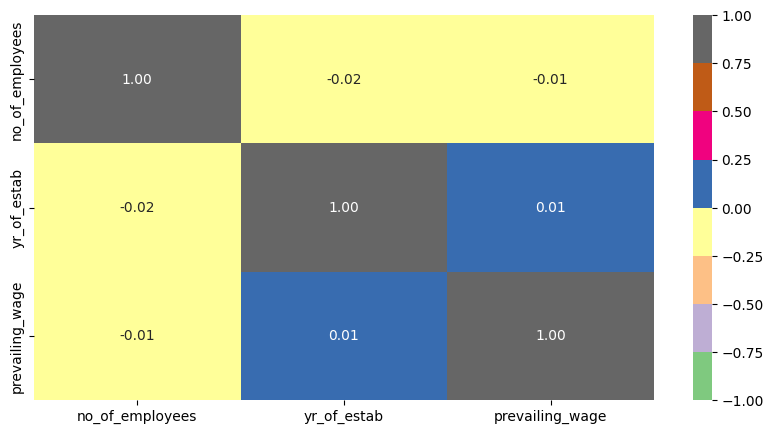

In [76]:
cols_list = df_visa.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df_visa[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
)
plt.show()

In [77]:
# Check 
def distribution_plot_wrt_target(df_visa, predictor, target):
    fig, axs = plt.subplots(2,2, figsize=(12,10))
    target_uniq = df_visa[target].unique()
    axs[0,0].set_title("Distribution of target for target" + str(target_uniq[0]))

    sns.histplot(
        data=df_visa[df_visa[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0,0],
        color="teal",
        stat="density"
    )

    axs[0,1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df_visa[df_visa[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0,1],
        color='orange',
        stat="density"
    )

    axs[1,0].set_title("Boxpplot w.r.t target")
    sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,0], palette="gist_rainbow")

    axs[1,1].set_title("Boxpplot (without outliers) w.r.t target")
    sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,1], showfliers=False, palette="gist_rainbow")

    plt.tight_layout()
    plt.show()
    

C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,0], palette="gist_rainbow")
C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,1], showfliers=False, palette="gist_rainbow")


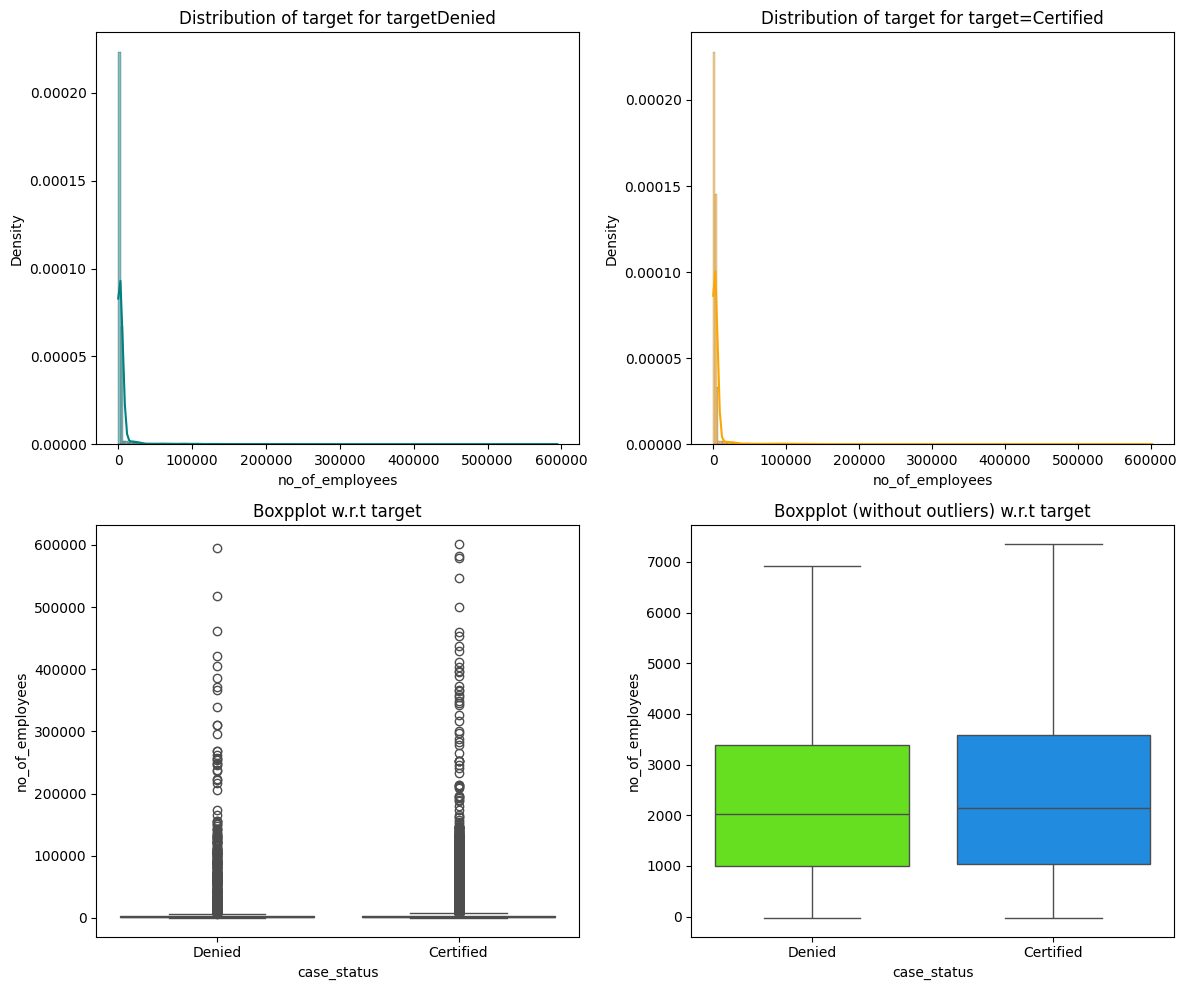

C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,0], palette="gist_rainbow")
C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,1], showfliers=False, palette="gist_rainbow")


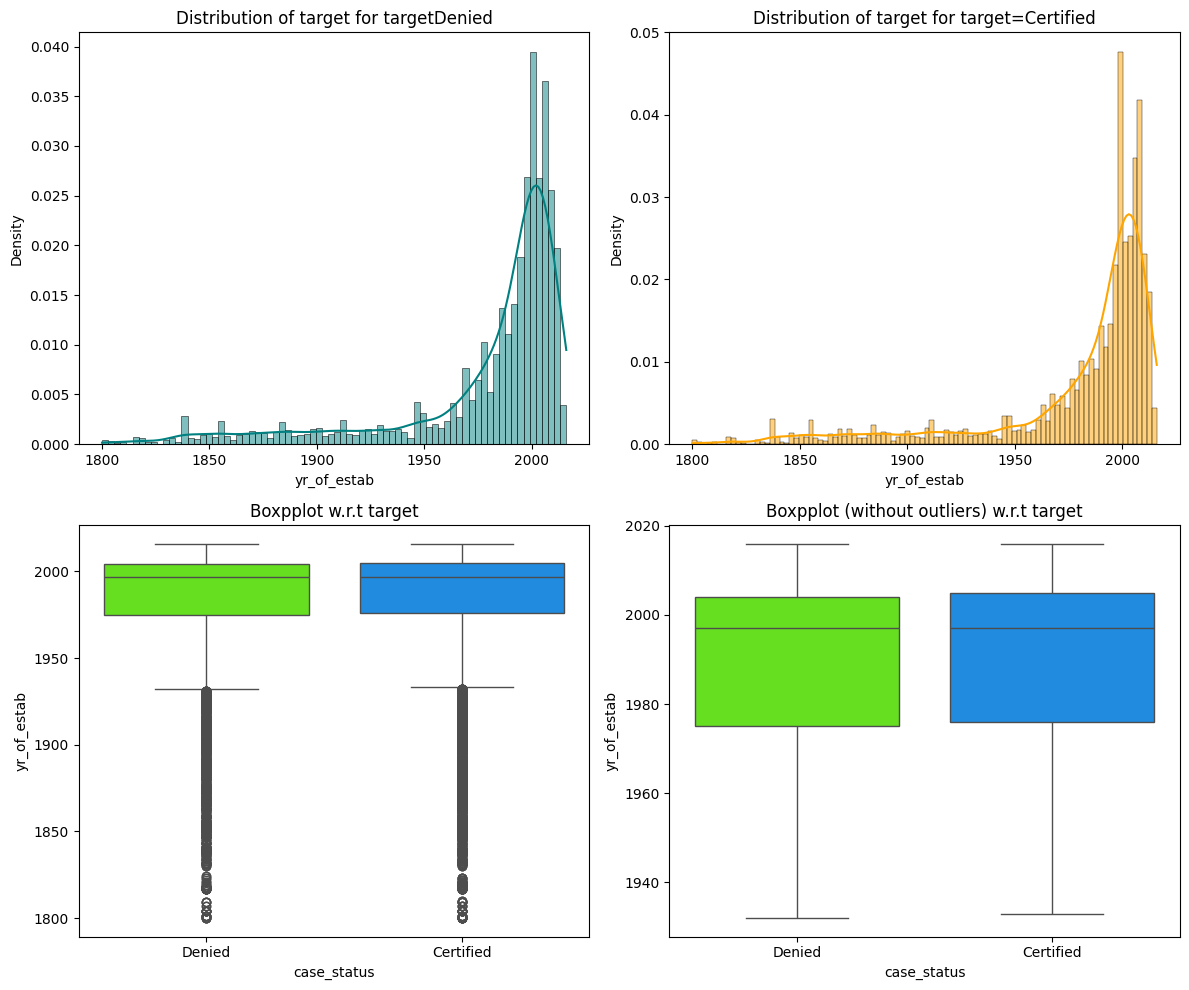

C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,0], palette="gist_rainbow")
C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\4181305417.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_visa, x=target, y=predictor, ax=axs[1,1], showfliers=False, palette="gist_rainbow")


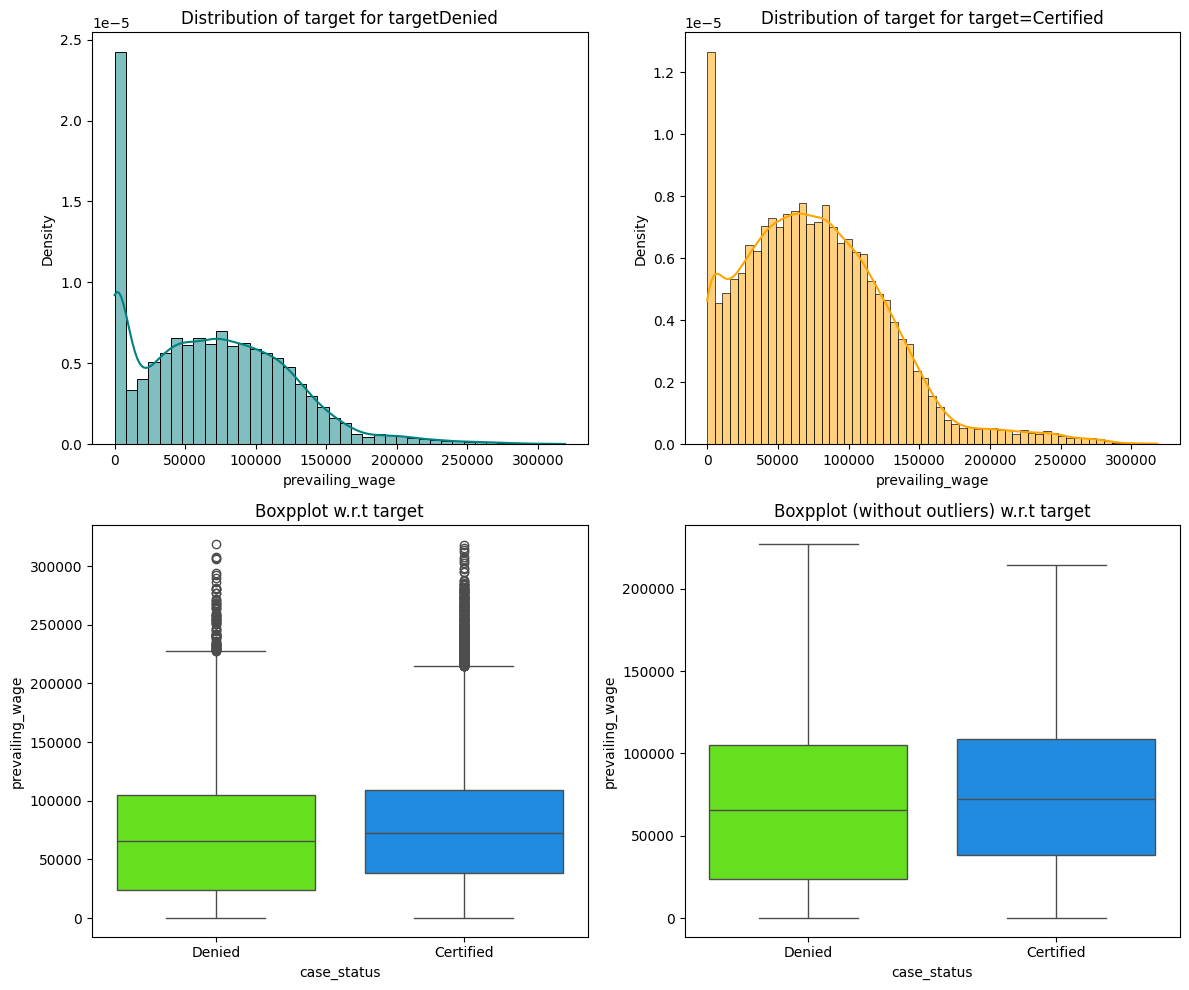

In [78]:
for col in num_col:
    distribution_plot_wrt_target(df_visa, col, 'case_status')

In [84]:
def categorical_plot_wrt_target(data, predictor, target):
    """
    Visualize the relationship between a categorical predictor and a categorical target
    using multiple plot types for better insight.
    This function produces a 2x2 grid of subplots:
        1. Count plot (frequency of predictor categories across target classes)
        2. Normalized stacked bar plot (percentage distribution)
        3. Heatmap of raw counts
        4. Heatmap of percentage distribution
    Parameters
    ----------
    data : pandas.DataFrame
        The dataset containing the predictor and target columns.
    predictor : str
        The name of the categorical predictor variable.
    target : str
        The name of the categorical target variable.
    Returns
    -------
    None
        The function displays visualizations and does not return a value.
    """
    # Set the overall figure size for all subplots (width=14, height=10)
    plt.figure(figsize=(14, 10))
    # --- COUNT PLOT ---
    # Create the first subplot (top-left position)
    plt.subplot(2, 2, 1)
    # Draw a count plot showing how the predictor categories are distributed across each target class (using hue for color separation)
    sns.countplot(data=data, x=predictor, hue=target, palette="Set2")
    # Set the title of the first subplot
    plt.title(f"Count of {predictor} by {target}")
    # Label the x-axis and y-axis
    plt.xlabel(predictor)
    plt.ylabel("Count")
    # Add a legend showing the target categories
    plt.legend(title=target)
    # -- NORMALIZED (PERCENTAGE) STACKED BAR PLOT ---
    # Create the second subplot (top-right position)
    plt.subplot(2, 2, 2)
    # Create a crosstab to show how target categories are distributed
    # within each predictor category (normalized by rows to get percentages)
    cross_tab = pd.crosstab(data[predictor], data[target], normalize='index') * 100
    # Plot the normalized crosstab as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')
    # Add title and axis labels
    plt.title(f"Percentage distribution of {target} within each {predictor}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(predictor)
    # Move the legend slightly outside the plot for better visibility
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    # --- HEATMAP OF RAW COUNTS ---
    # Create the third subplot (bottom-left position)
    plt.subplot(2, 2, 3)
    # Create a crosstab of raw counts between predictor and target
    cross_tab_counts = pd.crosstab(data[predictor], data[target])
    # Draw a heatmap to visualize the count values between predictor and target
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap="coolwarm")
    # Set the title and axis labels for this heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (counts)")
    plt.xlabel(target)
    plt.ylabel(predictor)
    # --- HEATMAP OF PERCENTAGES ---
    # Create the fourth subplot (bottom-right position)
    plt.subplot(2, 2, 4)
    # Draw another heatmap using the percentage crosstab
    # Annotate each cell with percentage values (1 decimal place)
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
    # Set the title and axis labels for the percentage heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (percentage)")
    plt.xlabel(target)
    plt.ylabel(predictor)
    plt.tight_layout()   # Adjust layout to prevent overlap between titles, labels, and subplots
    plt.show()    # Display all plots on the screen


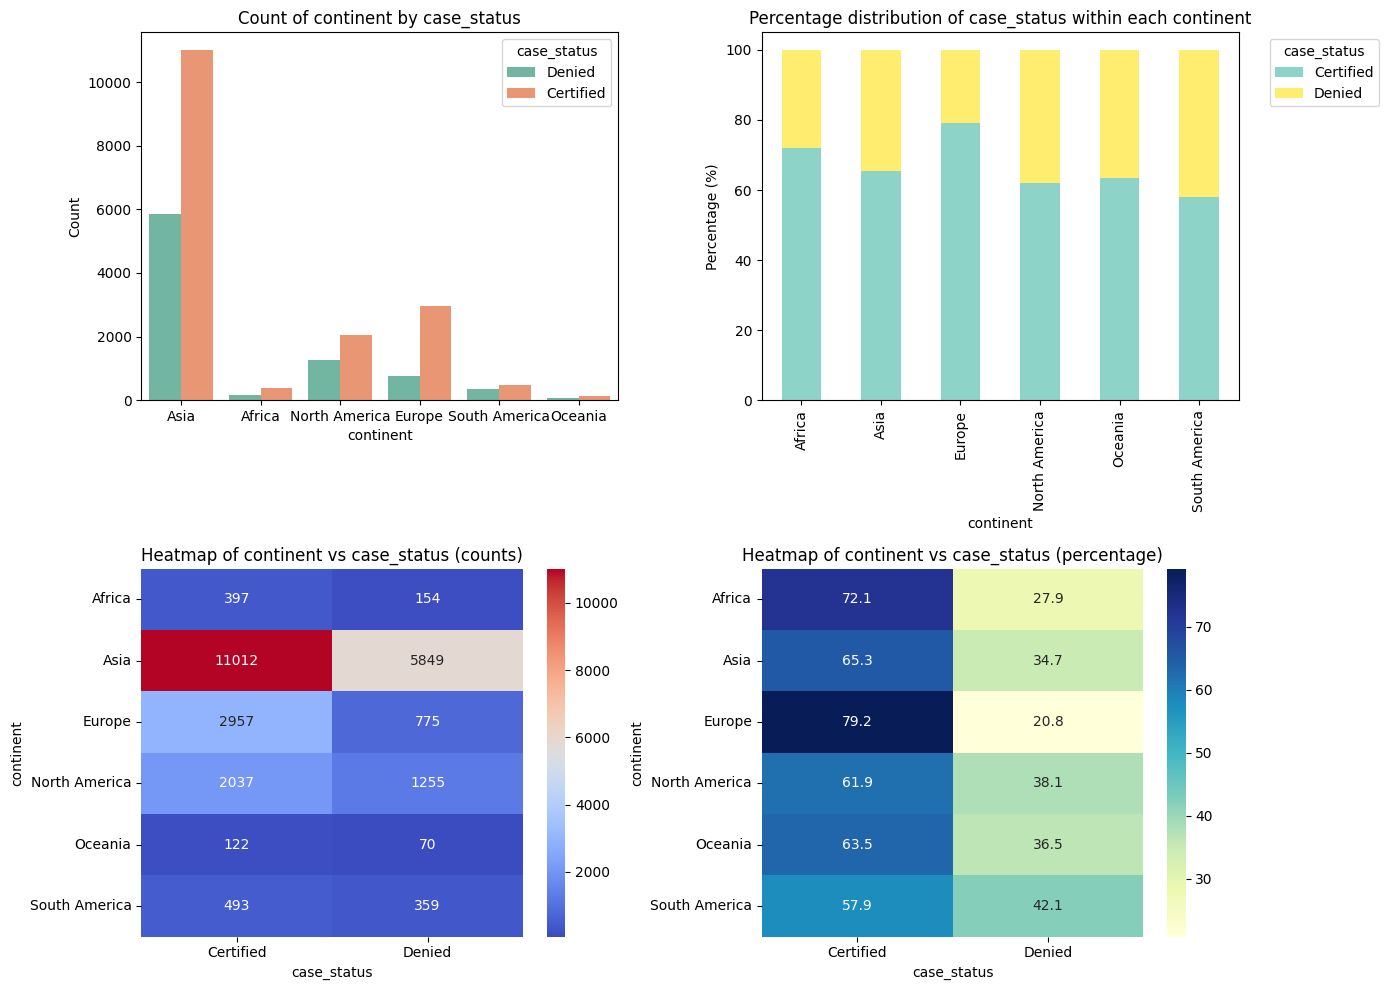

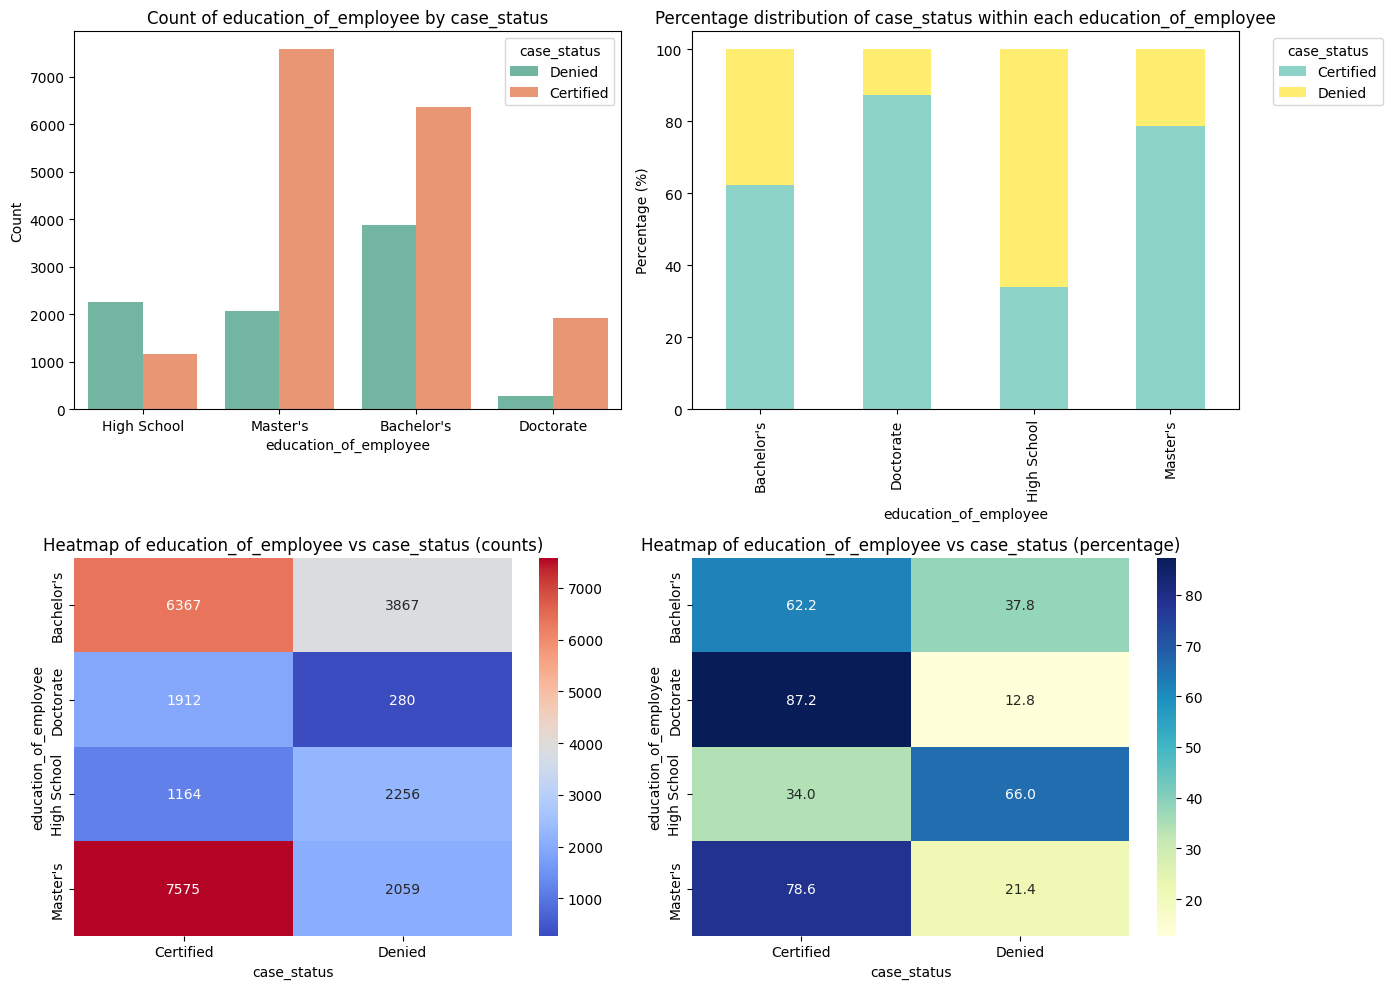

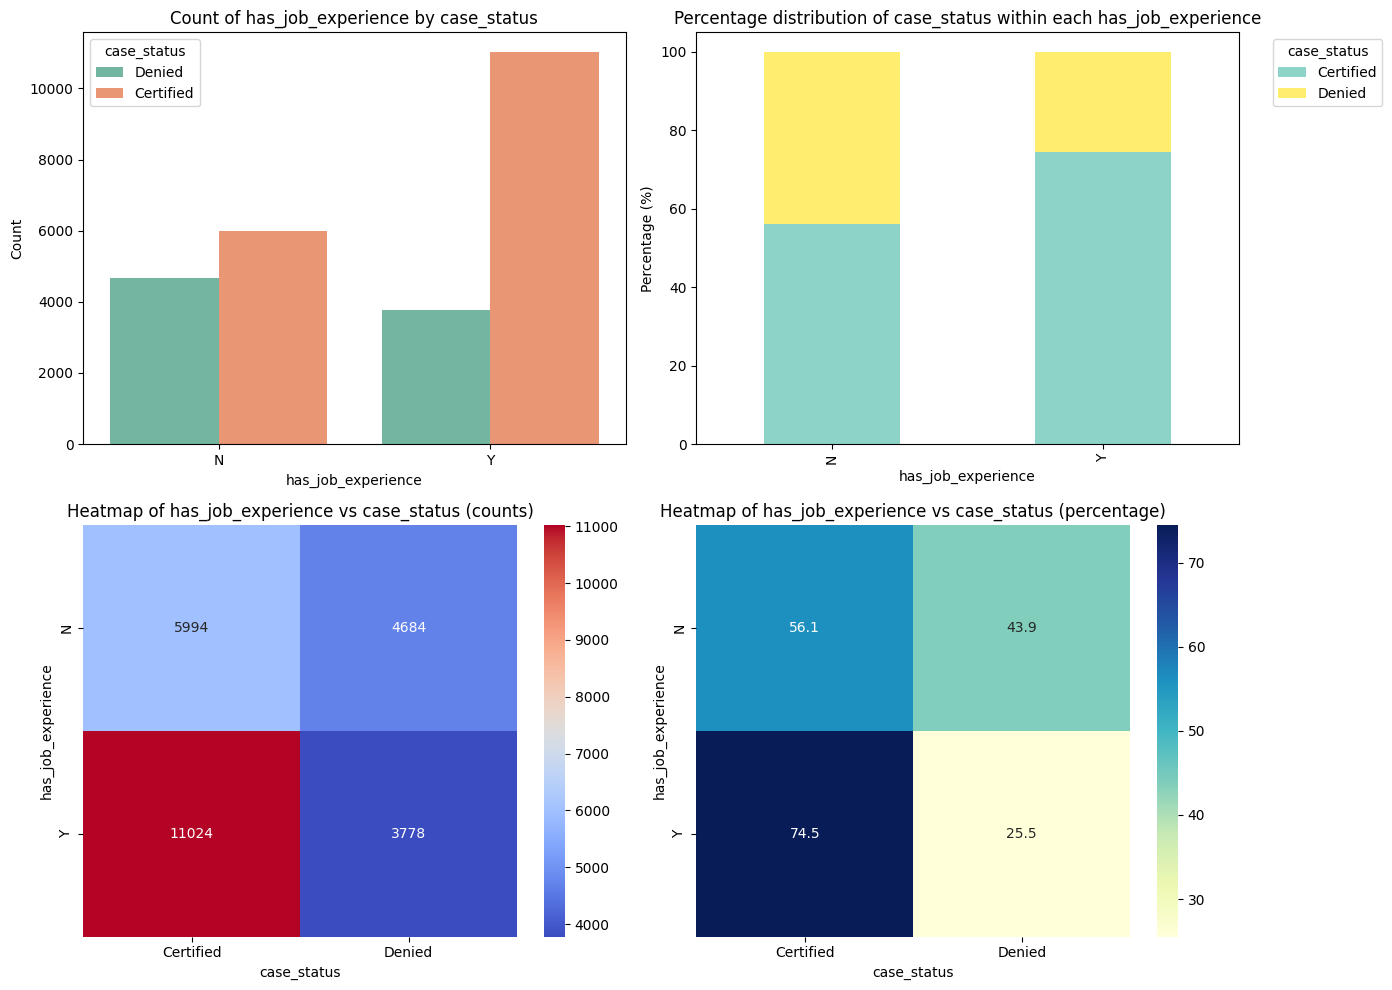

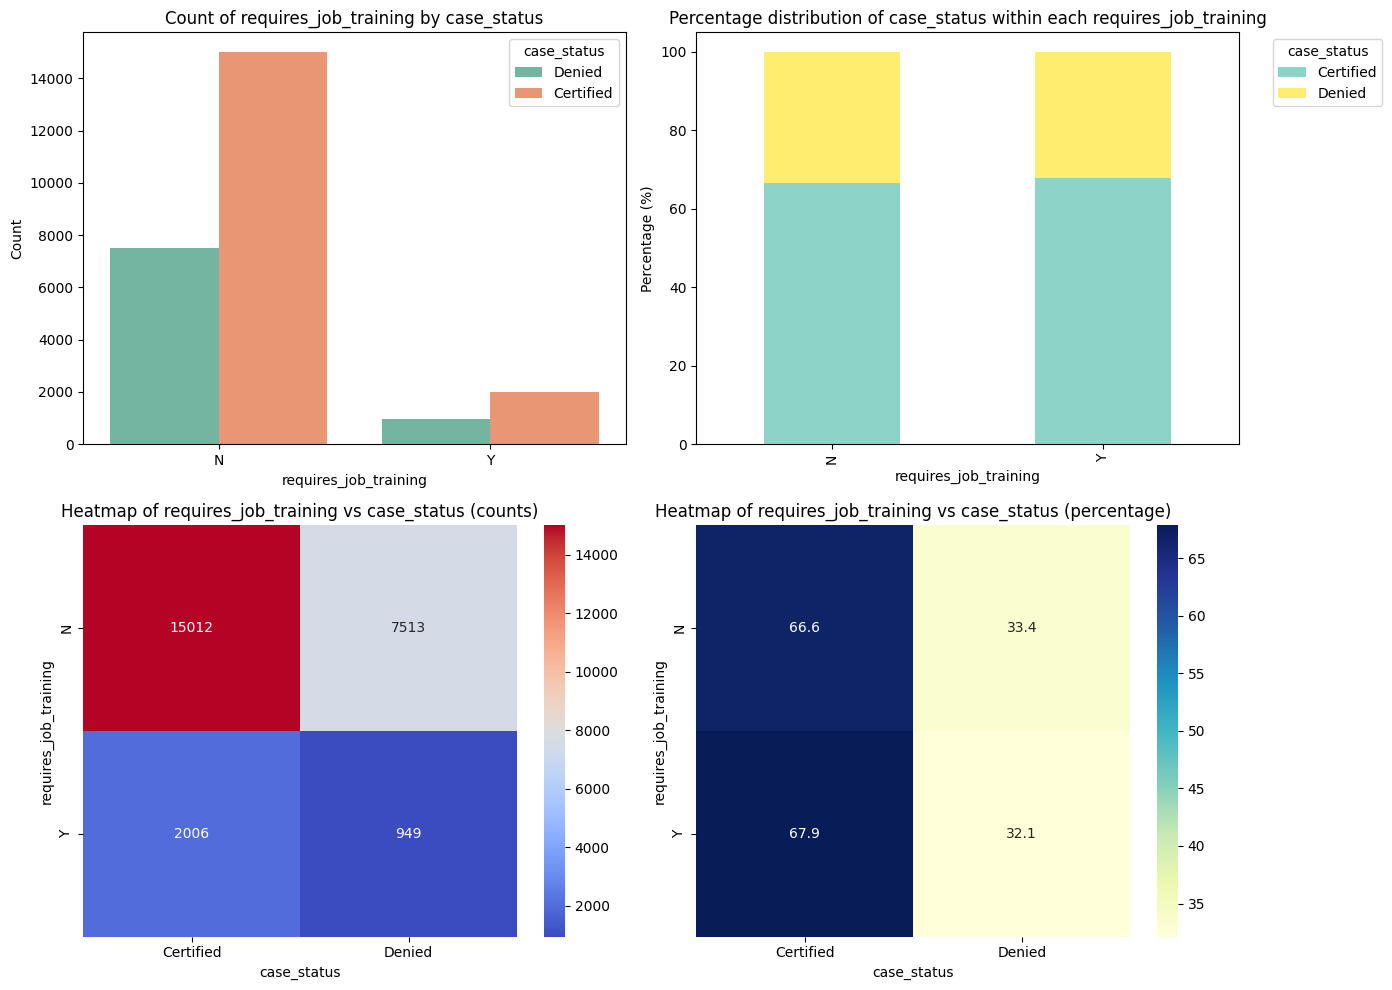

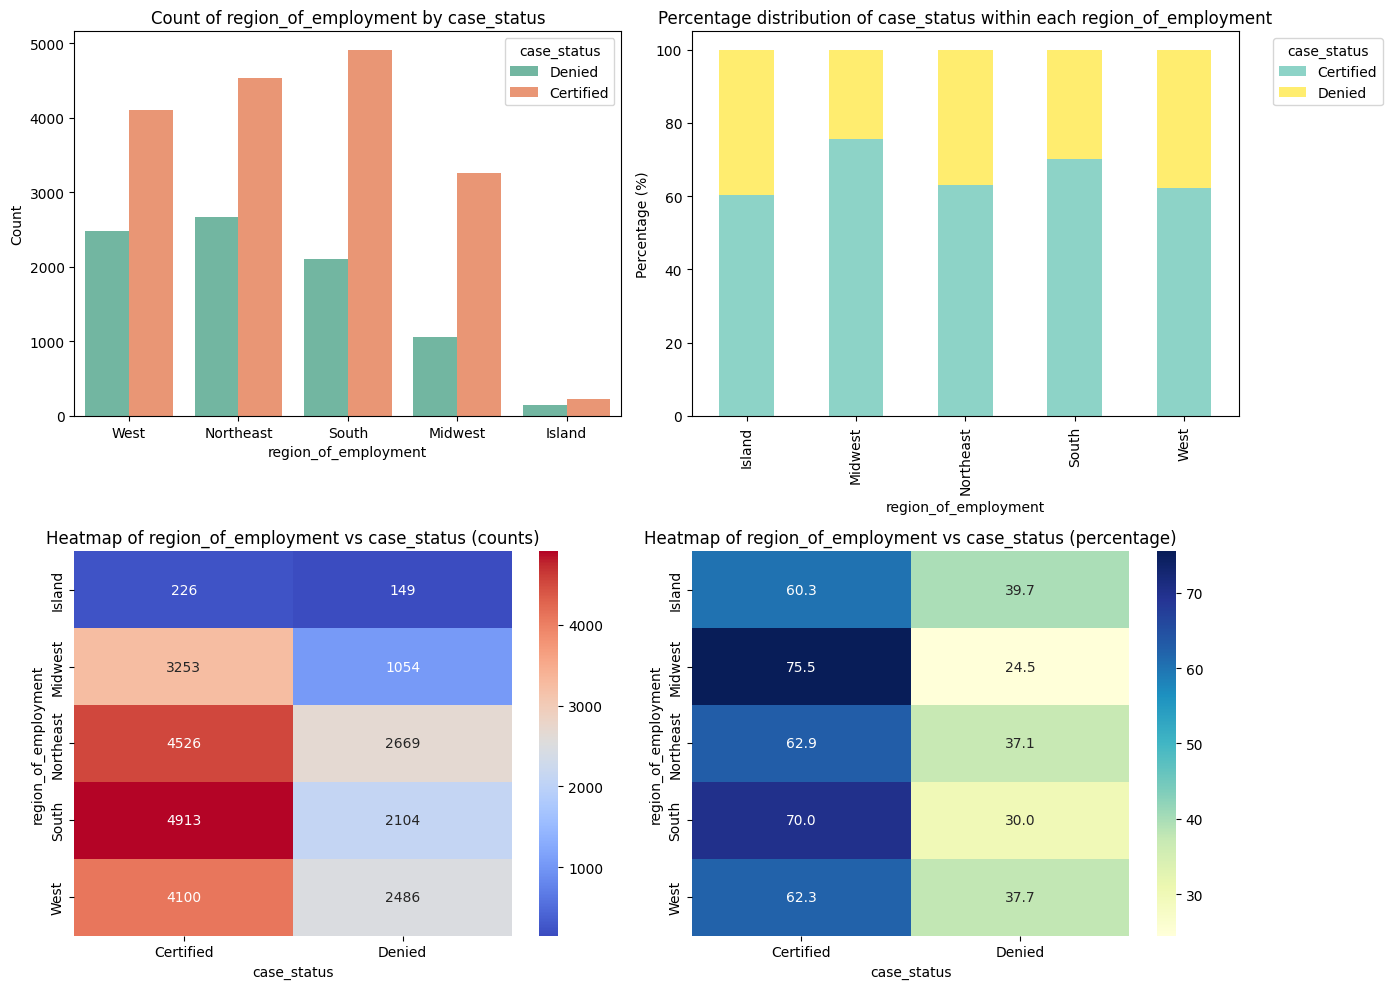

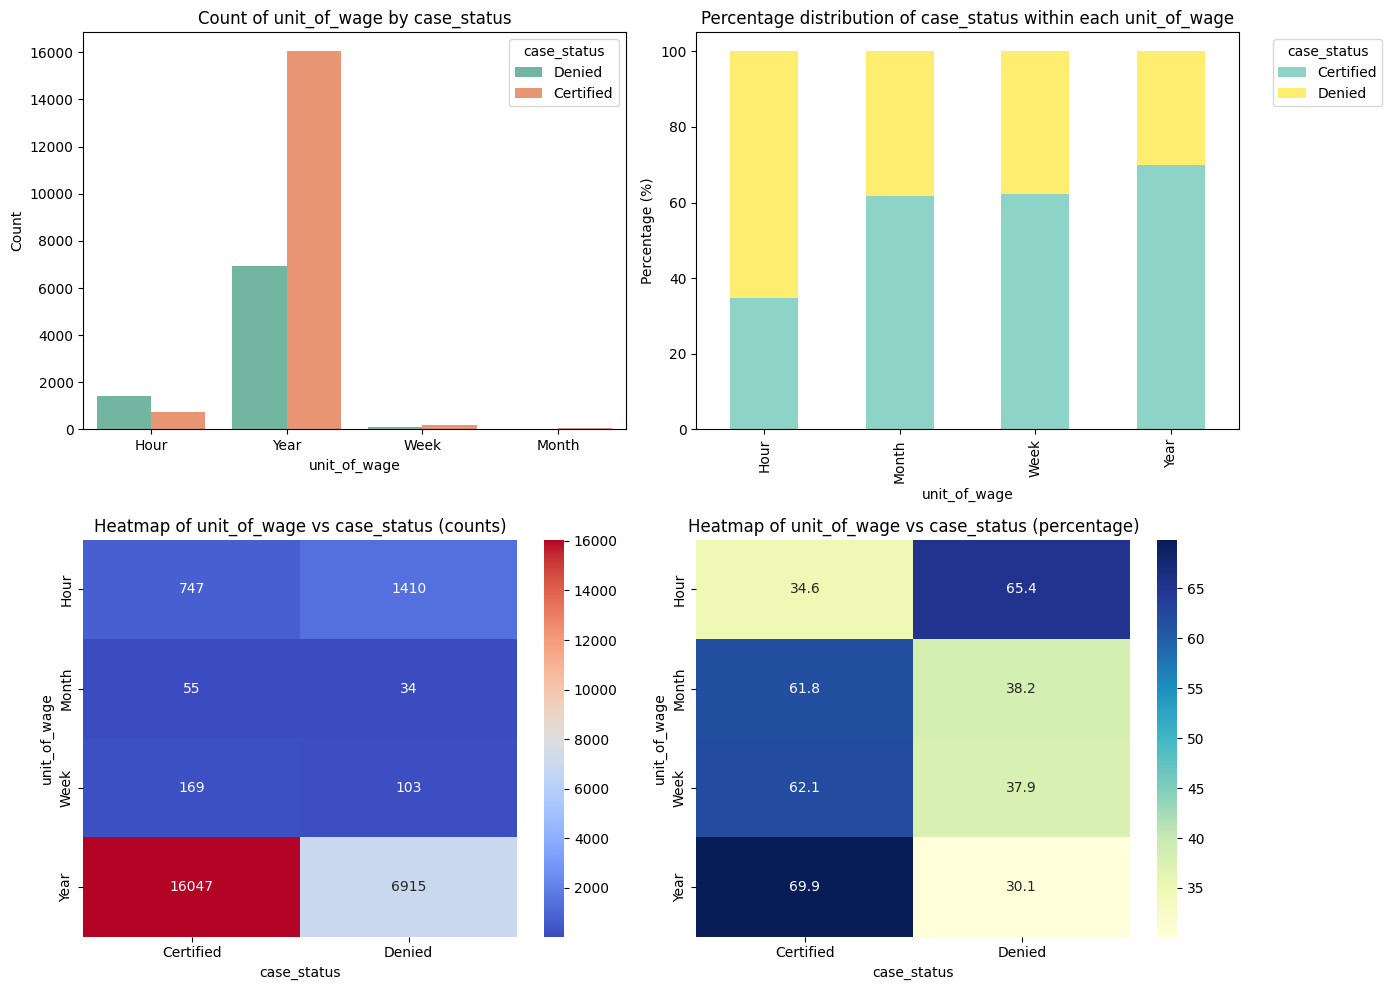

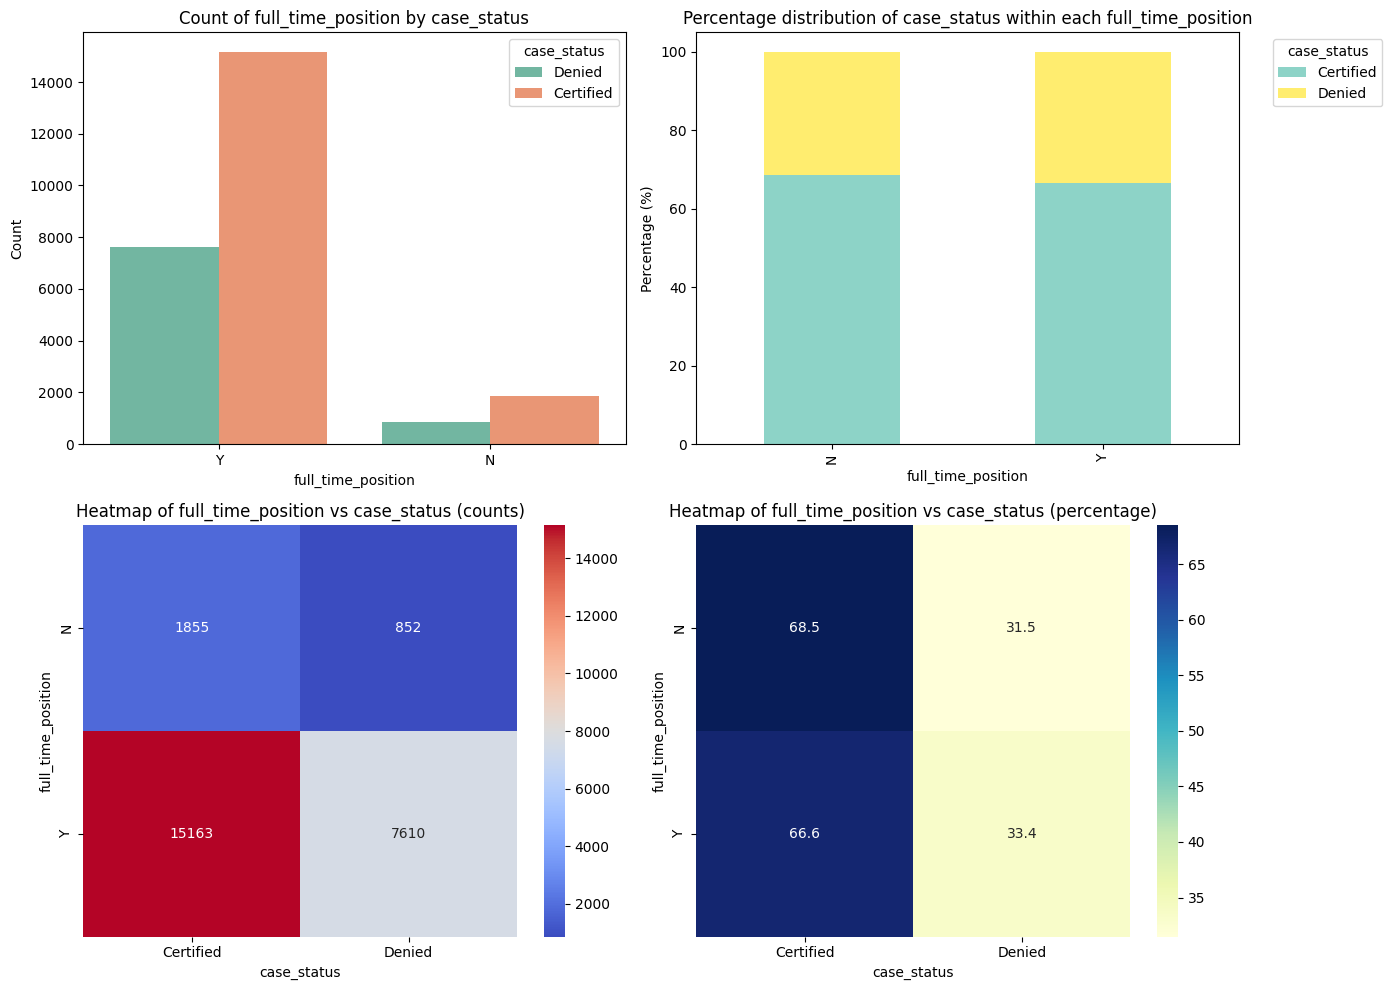

C:\Users\kanyi\AppData\Local\Temp\ipykernel_10820\589320276.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


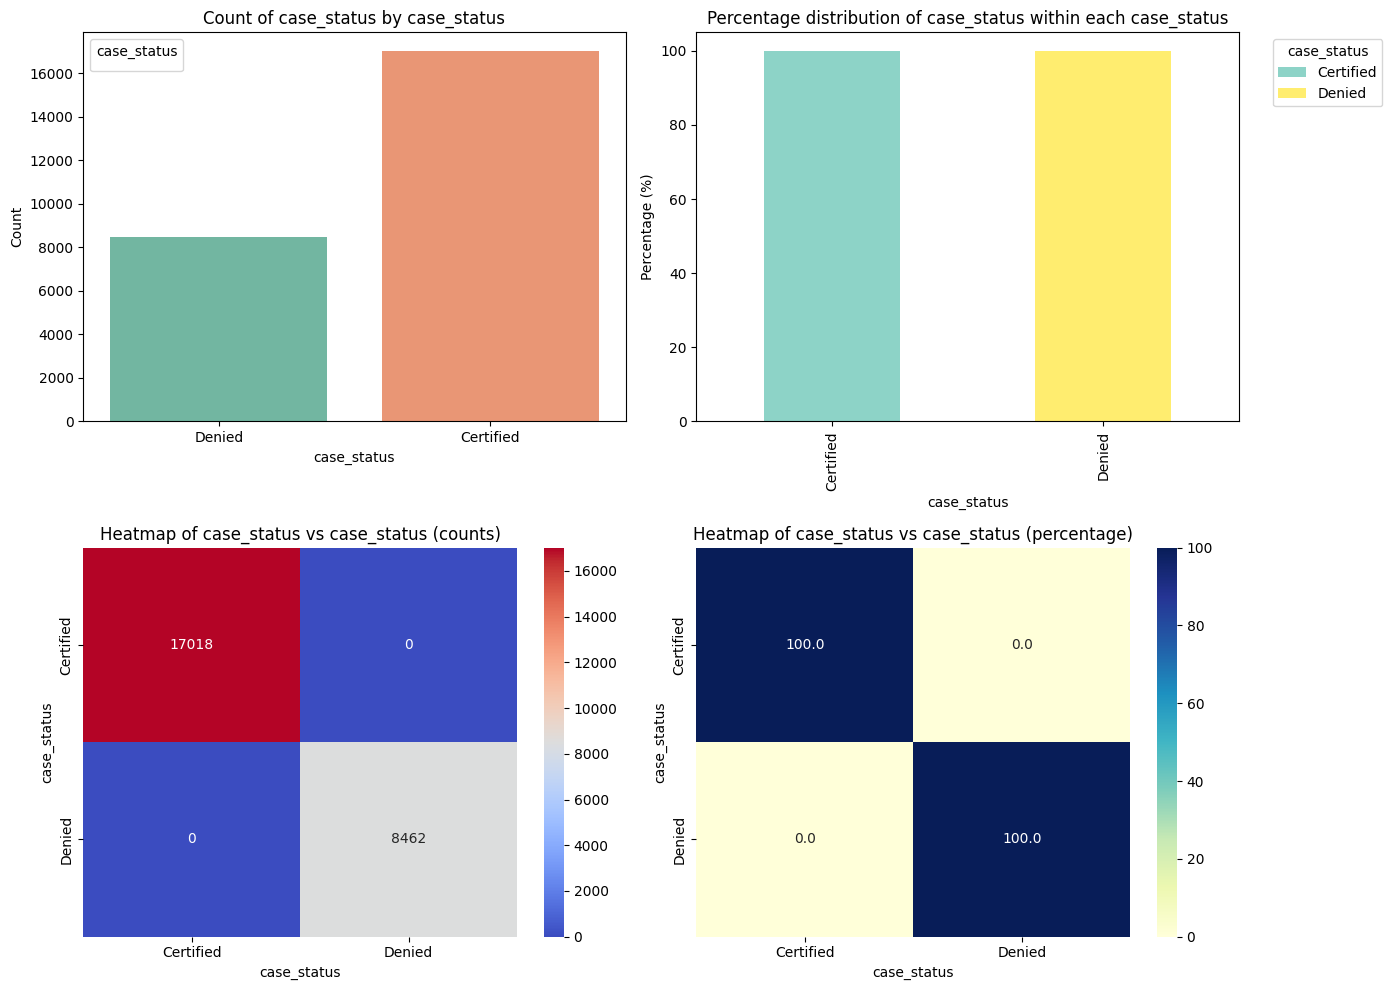

In [85]:
for col in cat_col:
    categorical_plot_wrt_target(df_visa, col, 'case_status')

#### **Insights from Histohgram and Boxplot Visualizations**

**1. No_of_Employees**
- The distribution is strongly right skewed, the higher concentration of employees is slightly above 5000.
- **Outliers**: There are outliers on the higher end (above 7,000) which may significantly depend on the dataset context.
- **Action**: Consider using Log-Transformation

**2. Year of Establishment**
- **Distribution**: The distribution is left-skewd, the higher concentration of establishment is be;ow the 1940's
- **Outliers**: The boxplot shows several outliers below the lower bond which could represent disparity in the year of establishment.
- **Action:** You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.

**3. Prevailing wage**
- **Prevailing wage:** is moderatley skewed, this could be has a result of the wages paid per year
- **Outliers:** The boxplot shows several outliers above the upper bound which could show disparity in the wages paid.
-**Action:** You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.

**4. Class Balance:** The class is imbalanced, consider using SMOTE, Class weight, oversampling or undersampling.